In [1]:
import pandas as pd

# Laden der Daten
file_path = 'Airbnb_Open_Data_Cleaned.csv'
airbnb_data = pd.read_csv(file_path)



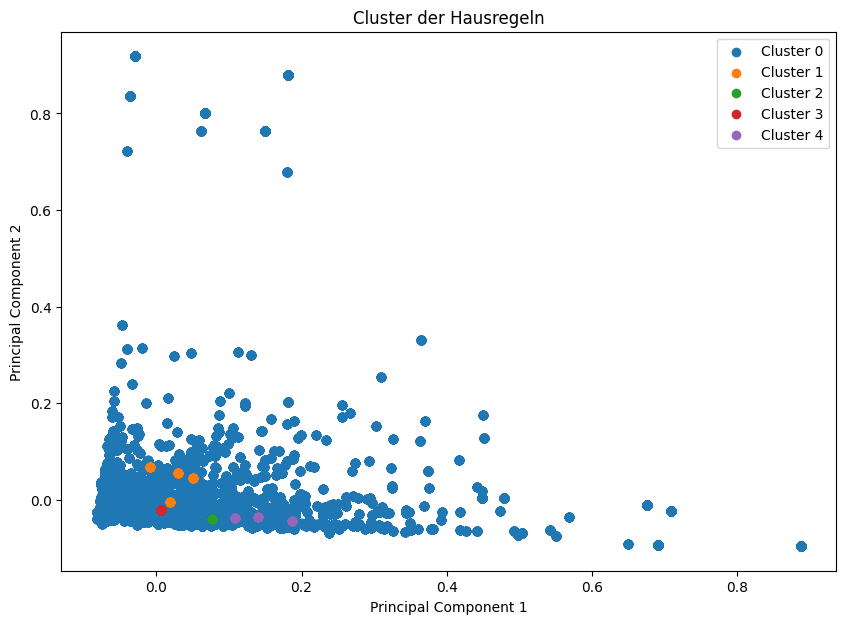

,review rate number,number of reviews
cluster,,
0,8.028940,27.455787
1,6.593023,24.534884
2,5.766667,15.633333
3,7.818182,22.477273
4,6.284768,19.867550


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Schritt 1: Text-Vorverarbeitung und Vektorisierung der Hausregeln
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(airbnb_data['house_rules'])

# K-Means Clustering anwenden
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
airbnb_data['cluster'] = kmeans.labels_

# Schritt 2: Dimensionenreduktion mit PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.toarray())

# Visualisierung der Cluster
plt.figure(figsize=(10, 7))
for cluster in range(num_clusters):
    plt.scatter(
        principal_components[airbnb_data['cluster'] == cluster, 0],
        principal_components[airbnb_data['cluster'] == cluster, 1],
        label=f'Cluster {cluster}'
    )
plt.title('Cluster der Hausregeln')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Ausgabe der Cluster-Analyse
cluster_analysis = airbnb_data.groupby('cluster')[['review rate number', 'number of reviews']].mean()
cluster_analysis


In [3]:
# Analyse der Cluster
cluster_analysis = airbnb_data.groupby('cluster')[['review rate number', 'number of reviews']].mean()

print(cluster_analysis)

         review rate number  number of reviews
cluster                                       
0                  8.028940          27.455787
1                  6.593023          24.534884
2                  5.766667          15.633333
3                  7.818182          22.477273
4                  6.284768          19.867550


In [4]:
# Deskriptive Statistik der Preise
price_stats = airbnb_data['price'].describe()

# Vergleich der Preise in verschiedenen Clustern
cluster_price_comparison = airbnb_data.groupby('cluster')['price'].describe()


print(price_stats)
print(cluster_price_comparison)


count    102566.000000
mean          8.021186
std          20.494517
min           1.000000
25%           2.000000
50%           3.000000
75%           5.000000
max        1250.000000
Name: price, dtype: float64
            count      mean        std  min  25%  50%   75%     max
cluster                                                            
0        102074.0  8.028940  20.532929  1.0  2.0  3.0   5.0  1250.0
1            86.0  6.593023  11.528357  1.0  1.0  2.0   5.0    80.0
2            60.0  5.766667   6.692689  1.0  2.0  3.0   5.0    30.0
3            44.0  7.818182  10.184970  1.0  2.0  3.0  10.0    30.0
4           302.0  6.284768   9.292499  1.0  2.0  3.0   5.0    70.0


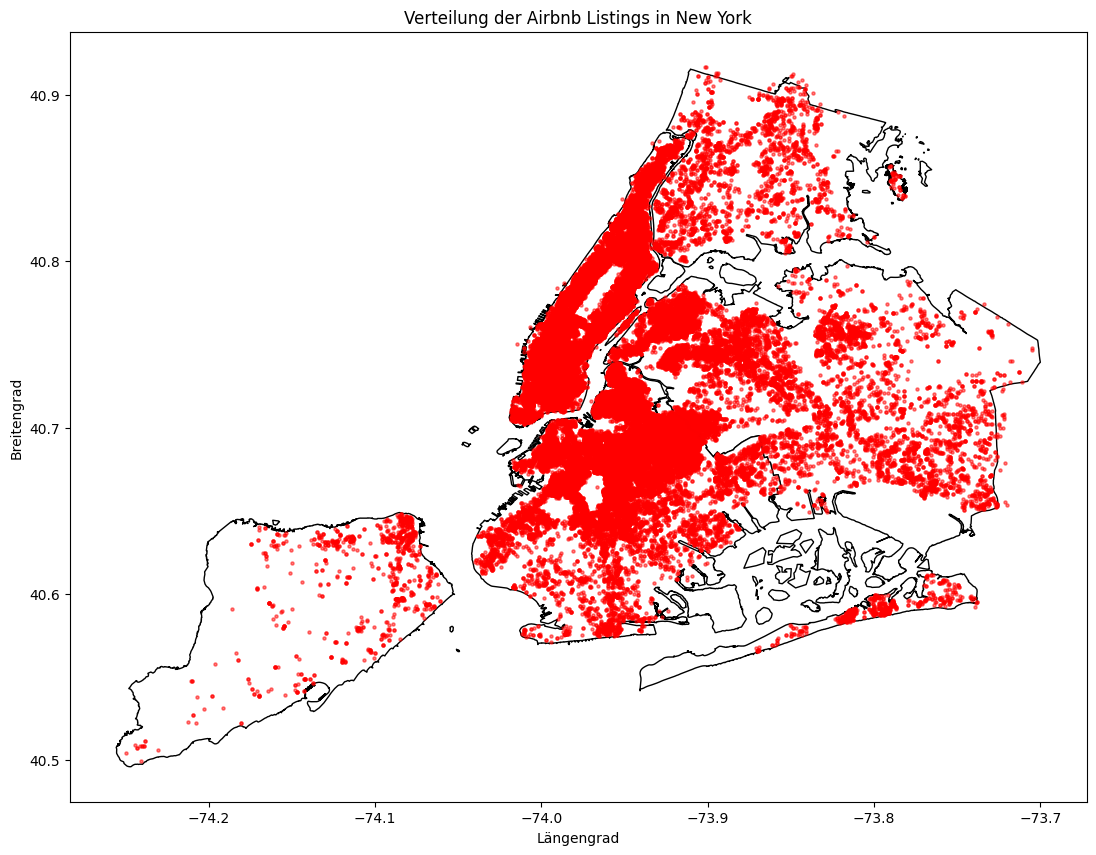

,review rate number,number of reviews,price
neighbourhood group,,,
Bronx,5.577802,31.667404,5.577802
Brooklyn,7.016922,28.479015,7.016922
Manhattan,9.645429,24.093923,9.645429
Queens,6.479650,33.608683,6.479650
Staten Island,5.896335,35.704712,5.896335


In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Laden der New York City Stadtteilgrenzen von OpenStreetMap
nyc_boundary_url = 'https://github.com/dwillis/nyc-maps/blob/master/boroughs.geojson?raw=true'
nyc = gpd.read_file(nyc_boundary_url)

# Geodatenframe erstellen
geometry = gpd.points_from_xy(airbnb_data['long'], airbnb_data['lat'])
geo_df = gpd.GeoDataFrame(airbnb_data, geometry=geometry)

# Kartendarstellung
fig, ax = plt.subplots(figsize=(15, 10))
base = nyc.plot(ax=ax, color='white', edgecolor='black')
geo_df.plot(ax=base, marker='o', color='red', markersize=5, alpha=0.5)

plt.title('Verteilung der Airbnb Listings in New York')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.show()

# Anzeigen der durchschnittlichen Bewertungen und Preise pro neighbourhood group
neighbourhood_group_stats = airbnb_data.groupby('neighbourhood group')[['review rate number', 'number of reviews', 'price']].mean()
neighbourhood_group_stats


In [6]:
# Anzeigen der durchschnittlichen Bewertungen und Preise pro neighbourhood group
neighbourhood_group_stats = airbnb_data.groupby('neighbourhood group')[['review rate number', 'number of reviews', 'price']].mean()

neighbourhood_group_stats


,review rate number,number of reviews,price
neighbourhood group,,,
Bronx,5.577802,31.667404,5.577802
Brooklyn,7.016922,28.479015,7.016922
Manhattan,9.645429,24.093923,9.645429
Queens,6.479650,33.608683,6.479650
Staten Island,5.896335,35.704712,5.896335


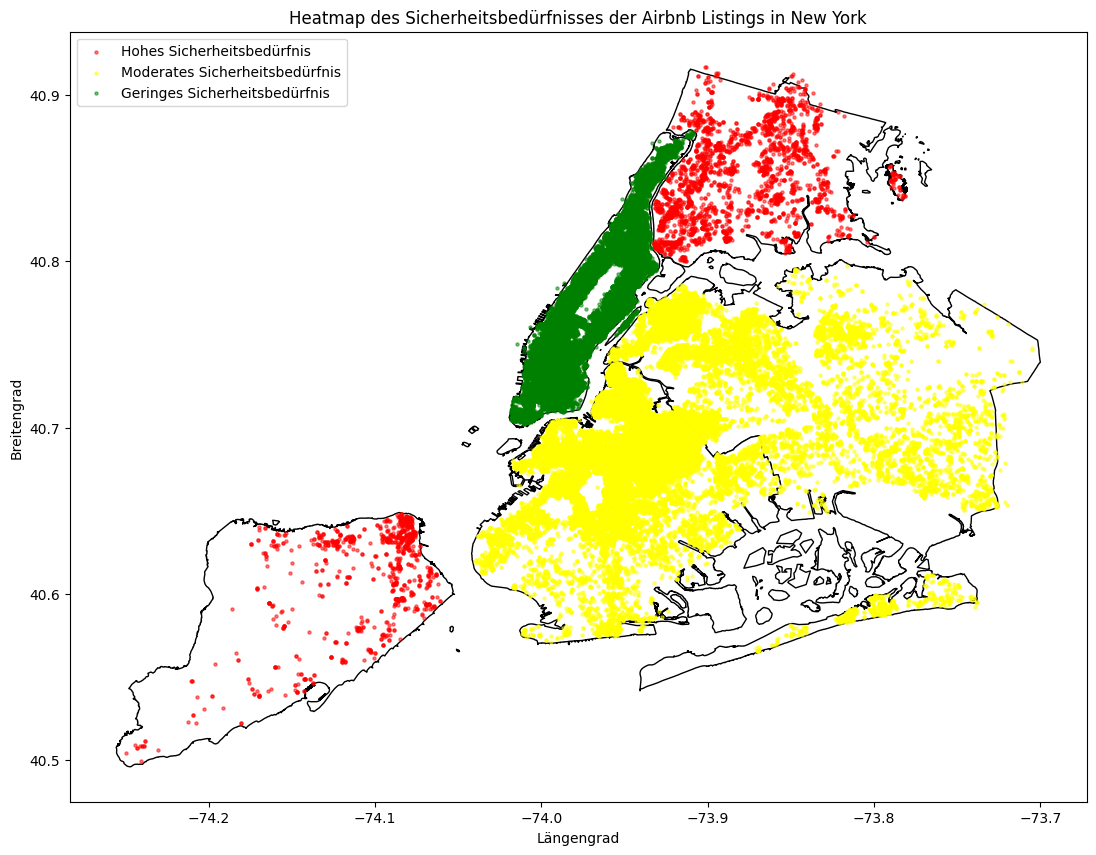

,review rate number,number of reviews,price,safety_category_stats
neighbourhood group,,,,
Bronx,5.577802,31.667404,5.577802,Hohes Sicherheitsbedürfnis
Brooklyn,7.016922,28.479015,7.016922,Moderates Sicherheitsbedürfnis
Manhattan,9.645429,24.093923,9.645429,Geringes Sicherheitsbedürfnis
Queens,6.479650,33.608683,6.479650,Moderates Sicherheitsbedürfnis
Staten Island,5.896335,35.704712,5.896335,Hohes Sicherheitsbedürfnis


In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Laden der New York City Stadtteilgrenzen von OpenStreetMap
nyc_boundary_url = 'https://github.com/dwillis/nyc-maps/blob/master/boroughs.geojson?raw=true'
nyc = gpd.read_file(nyc_boundary_url)

# Kategorisierung der Regionen basierend auf den Bewertungen und Preisen
def categorize_safety(row):
    if row['review rate number'] >= 8 and row['price'] >= 8:
        return 'Geringes Sicherheitsbedürfnis'
    elif row['review rate number'] >= 6 and row['price'] >= 6:
        return 'Moderates Sicherheitsbedürfnis'
    else:
        return 'Hohes Sicherheitsbedürfnis'

neighbourhood_group_stats['safety_category'] = neighbourhood_group_stats.apply(categorize_safety, axis=1)

# Umbenennung der Spalte, um Konflikte zu vermeiden
neighbourhood_group_stats = neighbourhood_group_stats.rename(columns={'safety_category': 'safety_category_stats'})

# Hinzufügen der Sicherheitskategorie zu den Geodaten
airbnb_data = airbnb_data.merge(neighbourhood_group_stats[['safety_category_stats']], left_on='neighbourhood group', right_index=True)

# Umbenennung der zusammengeführten Spalte
airbnb_data = airbnb_data.rename(columns={'safety_category_stats': 'safety_category'})

# Geodatenframe erstellen
geometry = gpd.points_from_xy(airbnb_data['long'], airbnb_data['lat'])
geo_df = gpd.GeoDataFrame(airbnb_data, geometry=geometry)

# Kartendarstellung mit Heatmap
fig, ax = plt.subplots(figsize=(15, 10))
base = nyc.plot(ax=ax, color='white', edgecolor='black')

# Farben für die Sicherheitskategorien
colors = {'Hohes Sicherheitsbedürfnis': 'red', 'Moderates Sicherheitsbedürfnis': 'yellow', 'Geringes Sicherheitsbedürfnis': 'green'}
for category, color in colors.items():
    geo_df[geo_df['safety_category'] == category].plot(ax=base, marker='o', color=color, markersize=5, alpha=0.5, label=category)

plt.title('Heatmap des Sicherheitsbedürfnisses der Airbnb Listings in New York')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.legend()
plt.show()

# Anzeigen der durchschnittlichen Bewertungen und Preise pro neighbourhood group
neighbourhood_group_stats


In [8]:
airbnb_data.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,lat_rad,long_rad,cluster,safety_category
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Brooklyn,40.64749,-73.97237,United States,...,0.21,10.0,6.0,286.0,Clean up and treat the home the way you'd like...,no,0.709433,-1.291061,0,Moderates Sicherheitsbedürfnis
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Manhattan,40.75362,-73.98377,United States,...,0.38,30.0,2.0,228.0,Pet friendly but please confirm with me if the...,no,0.711285,-1.291260,0,Geringes Sicherheitsbedürfnis
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,unconfirmed,Elise,Manhattan,Manhattan,40.80902,-73.94190,United States,...,0.00,3.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",no,0.712252,-1.290530,0,Geringes Sicherheitsbedürfnis
3,1002755,missing,85098326012,unconfirmed,Garry,Brooklyn,Brooklyn,40.68514,-73.95976,United States,...,4.64,30.0,1.0,322.0,no,no,0.710090,-1.290841,0,Moderates Sicherheitsbedürfnis
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,Manhattan,40.79851,-73.94399,United States,...,0.10,10.0,1.0,289.0,"Please no smoking in the house, porch or on th...",no,0.712068,-1.290566,0,Geringes Sicherheitsbedürfnis


In [9]:
# Deskriptive Statistik der Komfortfaktoren
comfort_factors = ['room type', 'service fee', 'price', 'number of reviews', 'review rate number', 
                   'reviews per month', 'calculated host listings count', 'availability 365', 
                   'instant_bookable', 'cancellation_policy']

# Überblick über die deskriptive Statistik
comfort_stats = airbnb_data[comfort_factors].describe(include='all')

comfort_stats

,room type,service fee,price,number of reviews,review rate number,reviews per month,calculated host listings count,availability 365,instant_bookable,cancellation_policy
count,102566,102566.000000,102566.000000,102566.000000,102566.000000,102566.000000,102566.000000,102566.000000,102566,102566
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4
top,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,moderate
freq,53681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51561,34333
mean,NaN,8.021186,8.021186,27.421943,8.021186,1.161556,7.917156,140.961391,NaN,NaN
std,NaN,20.494517,20.494517,49.450253,20.494517,1.680960,32.175927,135.176766,NaN,NaN
min,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,-10.000000,NaN,NaN
25%,NaN,2.000000,2.000000,1.000000,2.000000,0.090000,1.000000,3.000000,NaN,NaN
50%,NaN,3.000000,3.000000,7.000000,3.000000,0.480000,1.000000,97.000000,NaN,NaN
75%,NaN,5.000000,5.000000,30.000000,5.000000,1.710000,2.000000,268.000000,NaN,NaN


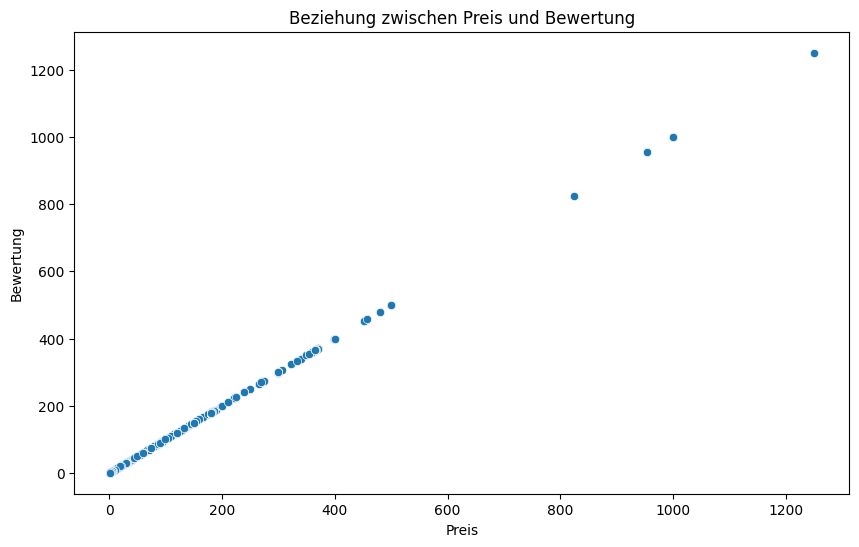

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
# Scatterplot von price und review rate number
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='review rate number', data=airbnb_data)
plt.title('Beziehung zwischen Preis und Bewertung')
plt.xlabel('Preis')
plt.ylabel('Bewertung')
plt.show()

In [11]:
import pandas as pd

# Einlesen des Datensatzes

# Komfortfaktoren
comfort_factors = ['room type', 'service fee', 'price', 'number of reviews', 'review rate number', 
                   'reviews per month', 'calculated host listings count', 'availability 365', 
                   'instant_bookable', 'cancellation_policy']

# Überblick über die deskriptive Statistik
comfort_stats = airbnb_data[comfort_factors].describe(include='all')
comfort_stats


,room type,service fee,price,number of reviews,review rate number,reviews per month,calculated host listings count,availability 365,instant_bookable,cancellation_policy
count,102566,102566.000000,102566.000000,102566.000000,102566.000000,102566.000000,102566.000000,102566.000000,102566,102566
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4
top,Entire home/apt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,moderate
freq,53681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51561,34333
mean,NaN,8.021186,8.021186,27.421943,8.021186,1.161556,7.917156,140.961391,NaN,NaN
std,NaN,20.494517,20.494517,49.450253,20.494517,1.680960,32.175927,135.176766,NaN,NaN
min,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,-10.000000,NaN,NaN
25%,NaN,2.000000,2.000000,1.000000,2.000000,0.090000,1.000000,3.000000,NaN,NaN
50%,NaN,3.000000,3.000000,7.000000,3.000000,0.480000,1.000000,97.000000,NaN,NaN
75%,NaN,5.000000,5.000000,30.000000,5.000000,1.710000,2.000000,268.000000,NaN,NaN


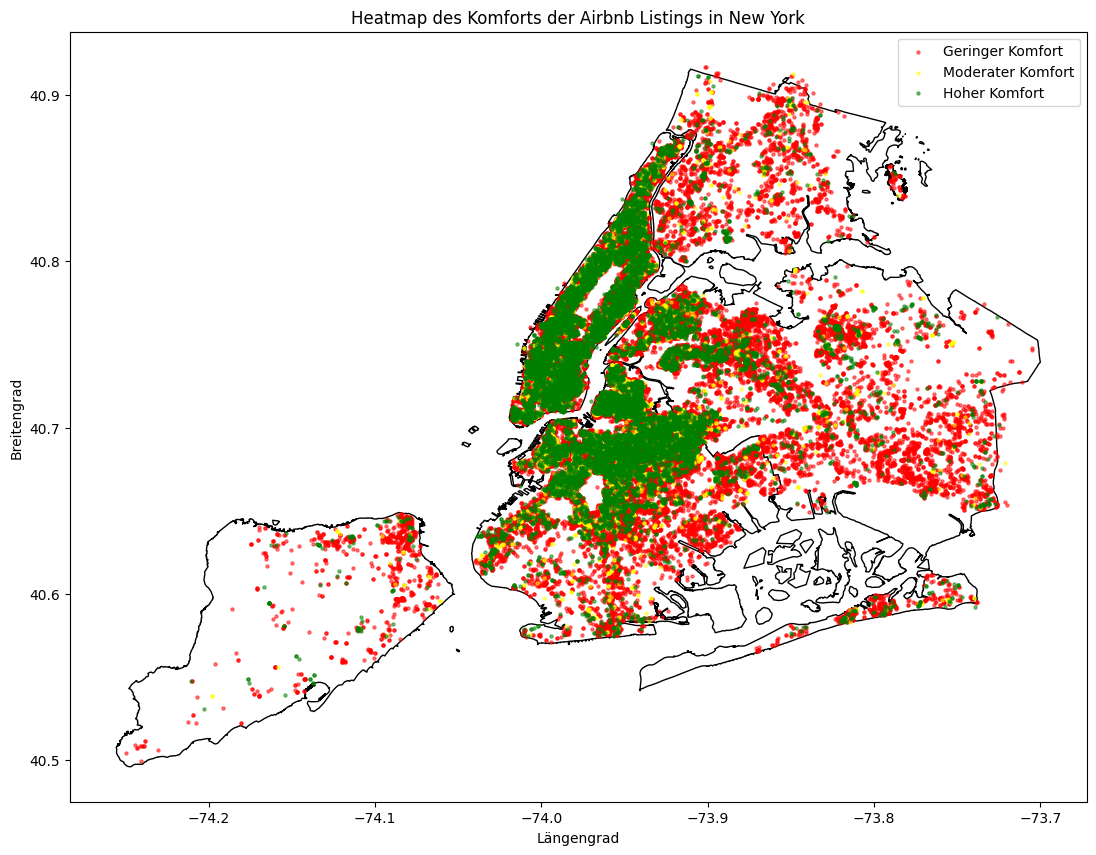

In [12]:
import geopandas as gpd

# Laden der New York City Stadtteilgrenzen von OpenStreetMap
nyc_boundary_url = 'https://github.com/dwillis/nyc-maps/blob/master/boroughs.geojson?raw=true'
nyc = gpd.read_file(nyc_boundary_url)

# Kategorisierung der Regionen basierend auf dem Komfort (z.B. Bewertung und Preis)
def categorize_comfort(row):
    if row['review rate number'] >= 8 and row['price'] >= 8:
        return 'Hoher Komfort'
    elif row['review rate number'] >= 6 and row['price'] >= 6:
        return 'Moderater Komfort'
    else:
        return 'Geringer Komfort'

airbnb_data['comfort_category'] = airbnb_data.apply(categorize_comfort, axis=1)

# Geodatenframe erstellen
geometry = gpd.points_from_xy(airbnb_data['long'], airbnb_data['lat'])
geo_df = gpd.GeoDataFrame(airbnb_data, geometry=geometry)

# Kartendarstellung mit Heatmap
fig, ax = plt.subplots(figsize=(15, 10))
base = nyc.plot(ax=ax, color='white', edgecolor='black')

# Farben für die Komfortkategorien
colors = {'Geringer Komfort': 'red', 'Moderater Komfort': 'yellow', 'Hoher Komfort': 'green'}
for category, color in colors.items():
    geo_df[geo_df['comfort_category'] == category].plot(ax=base, marker='o', color=color, markersize=5, alpha=0.5, label=category)

plt.title('Heatmap des Komforts der Airbnb Listings in New York')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.legend()
plt.show()



In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Invertierung von 'availability 365', da geringere Werte besser sind
airbnb_data['availability 365'] = 1 - scaler.fit_transform(airbnb_data[['availability 365']])

# Komfortfaktoren normalisieren (ohne 'availability 365', das bereits invers skaliert wurde)
comfort_factors = ['service fee', 'price', 'number of reviews', 'review rate number', 
                   'reviews per month', 'calculated host listings count', 'availability 365']

airbnb_data[comfort_factors[:-1]] = scaler.fit_transform(airbnb_data[comfort_factors[:-1]])



# Normalisierte Komfortfaktoren anzeigen
airbnb_data[comfort_factors].describe()

,service fee,price,number of reviews,review rate number,reviews per month,calculated host listings count,availability 365
count,102566.000000,102566.000000,102566.000000,102566.000000,102566.000000,102566.000000,102566.000000
mean,0.005621,0.005621,0.026779,0.005621,0.012906,0.020898,0.959056
std,0.016409,0.016409,0.048291,0.016409,0.018677,0.097208,0.036663
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000801,0.000801,0.000977,0.000801,0.001000,0.000000,0.924600
50%,0.001601,0.001601,0.006836,0.001601,0.005333,0.000000,0.970979
75%,0.003203,0.003203,0.029297,0.003203,0.019000,0.003021,0.996474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Komfort-Score berechnen als Mittelwert der normalisierten Faktoren
airbnb_data['comfort_score'] = airbnb_data[comfort_factors].mean(axis=1)

# Komfort-Score anzeigen
comfort_score_stats = airbnb_data[['comfort_score']].describe()
comfort_score_stats

,comfort_score
count,102566.000000
mean,0.148072
std,0.017395
min,0.038163
25%,0.140770
50%,0.144450
75%,0.150568
max,0.570360


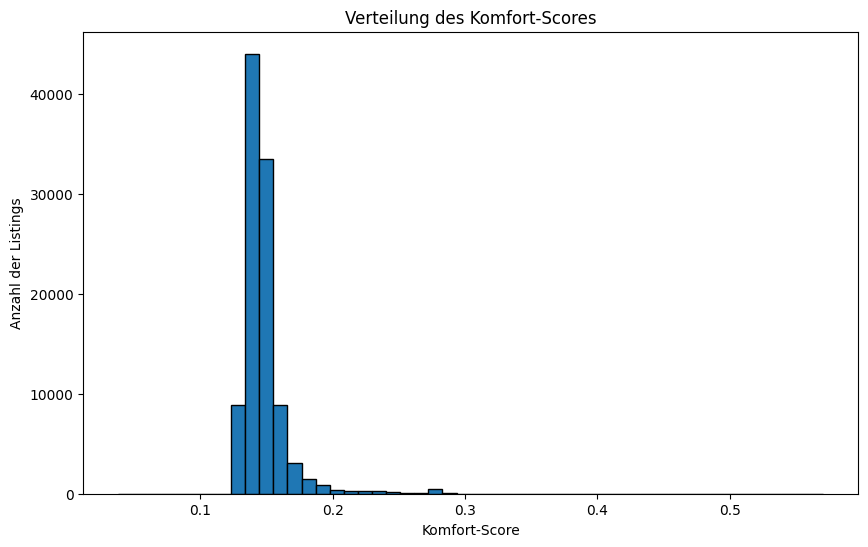

In [15]:
# Verteilung des Komfort-Scores anzeigen
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(airbnb_data['comfort_score'], bins=50, edgecolor='k')
plt.title('Verteilung des Komfort-Scores')
plt.xlabel('Komfort-Score')
plt.ylabel('Anzahl der Listings')
plt.show()


In [17]:
# Komfortkategorien basierend auf dem Komfort-Score erstellen
comfort_score = airbnb_data['comfort_score']
comfort_category = pd.cut(comfort_score, bins=[0, comfort_score.quantile(0.5), comfort_score.quantile(0.75), 1], labels=['Geringer Komfort', 'Moderater Komfort', 'Hoher Komfort'])

# Hinzufügen der Komfortkategorie zur DataFrame
airbnb_data['comfort_category'] = comfort_category

# Komfortkategorien anzeigen
comfort_category_counts = airbnb_data['comfort_category'].value_counts()
comfort_category_counts


comfort_category
Geringer Komfort     51284
Hoher Komfort        25642
Moderater Komfort    25640
Name: count, dtype: int64

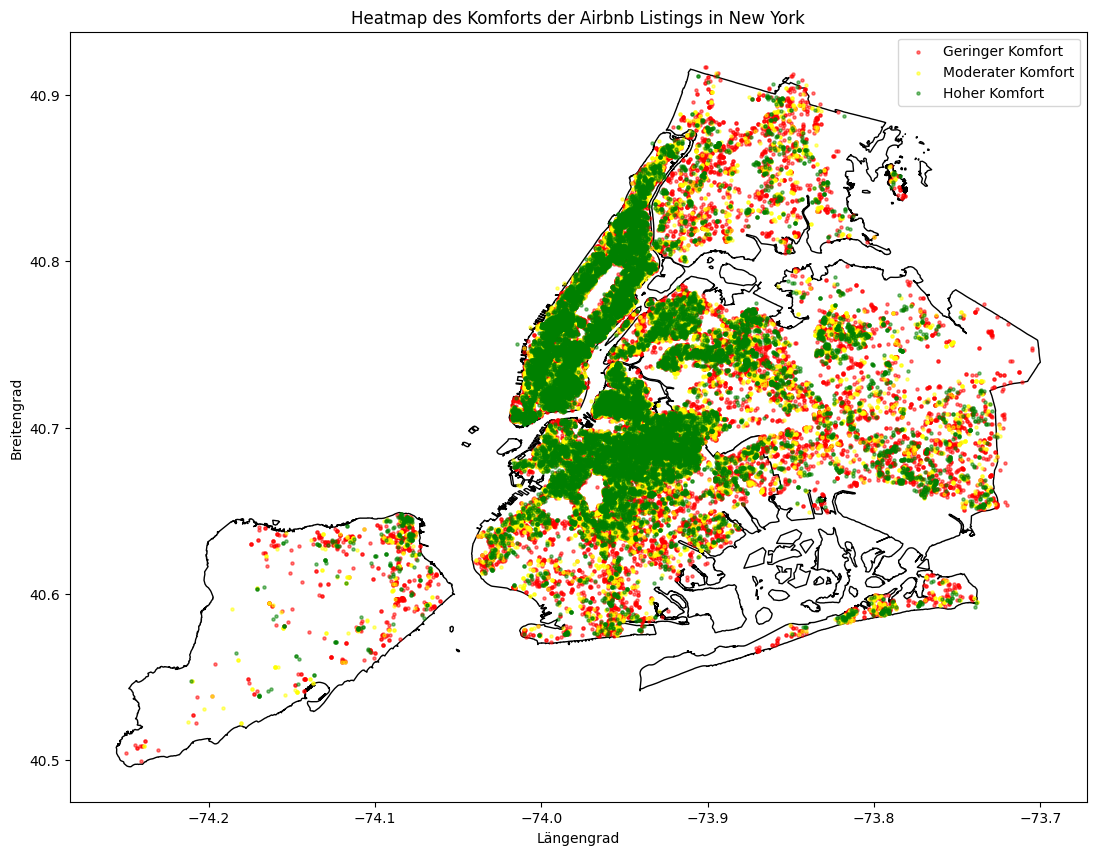

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Laden der New York City Stadtteilgrenzen von OpenStreetMap
nyc_boundary_url = 'https://github.com/dwillis/nyc-maps/blob/master/boroughs.geojson?raw=true'
nyc = gpd.read_file(nyc_boundary_url)

# Geodatenframe erstellen
geometry = gpd.points_from_xy(airbnb_data['long'], airbnb_data['lat'])
geo_df = gpd.GeoDataFrame(airbnb_data, geometry=geometry)

# Kartendarstellung mit Heatmap
fig, ax = plt.subplots(figsize=(15, 10))
base = nyc.plot(ax=ax, color='white', edgecolor='black')

# Farben für die Komfortkategorien
colors = {'Geringer Komfort': 'red', 'Moderater Komfort': 'yellow', 'Hoher Komfort': 'green'}
for category, color in colors.items():
    geo_df[geo_df['comfort_category'] == category].plot(ax=base, marker='o', color=color, markersize=5, alpha=0.5, label=category)

plt.title('Heatmap des Komforts der Airbnb Listings in New York')
plt.xlabel('Längengrad')
plt.ylabel('Breitengrad')
plt.legend()
plt.show()


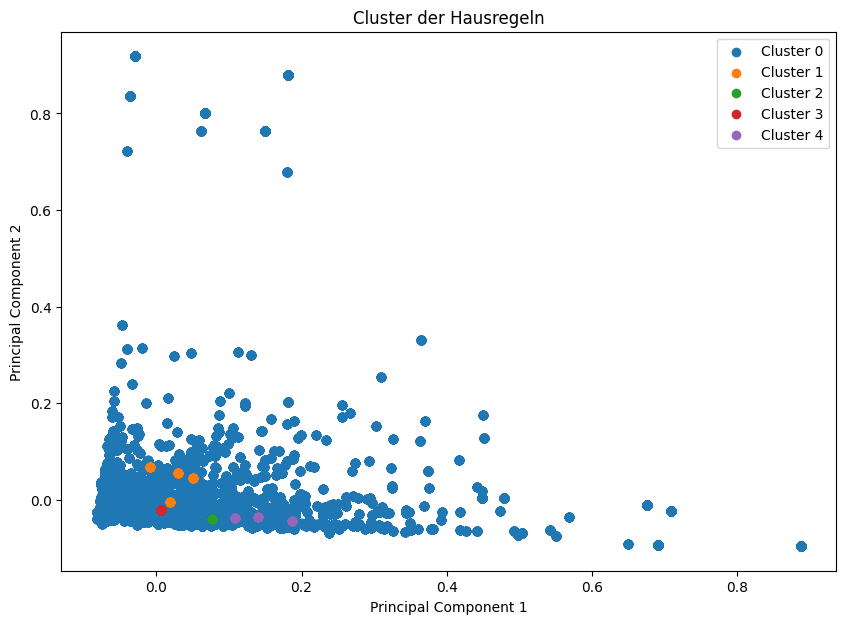

(         review rate number  number of reviews
 cluster                                       
 0                  0.005628           0.026812
 1                  0.004478           0.023960
 2                  0.003816           0.015267
 3                  0.005459           0.021950
 4                  0.004231           0.019402,
   Principal Component  Explained Variance Ratio
 0                 PC1                  0.072812
 1                 PC2                  0.042111,
          00       000      0000      00am      00pm        01        02  \
 0  0.000206  0.000125 -0.000065  0.000943  0.002419 -0.000006 -0.000006   
 1 -0.002570  0.000100  0.000156 -0.001744 -0.002735 -0.000005 -0.000005   
 
       02114     02129     02134  ...  希望房间里一切都好好的吧  我们收取100美金的押金以防房客给公寓带来任何损坏  \
 0 -0.000091 -0.000018 -0.000703  ...     -0.000477                  -0.000082   
 1  0.000013 -0.000045 -0.000377  ...     -0.000299                   0.000026   
 
    我们相信我们的房客都是有良好习惯的人  我们都是非常干净整洁的人 

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Schritt 1: Text-Vorverarbeitung und Vektorisierung der Hausregeln
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(airbnb_data['house_rules'])

# K-Means Clustering anwenden
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(X)
airbnb_data['cluster'] = kmeans.labels_

# Schritt 2: Dimensionenreduktion mit PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X.toarray())

# Visualisierung der Cluster
plt.figure(figsize=(10, 7))
for cluster in range(num_clusters):
    plt.scatter(
        principal_components[airbnb_data['cluster'] == cluster, 0],
        principal_components[airbnb_data['cluster'] == cluster, 1],
        label=f'Cluster {cluster}'
    )
plt.title('Cluster der Hausregeln')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Ausgabe der Cluster-Analyse
cluster_analysis = airbnb_data.groupby('cluster')[['review rate number', 'number of reviews']].mean()

# Varianzanteile der Hauptkomponenten
explained_variance_ratio = pca.explained_variance_ratio_

# Komponenten der Hauptkomponenten
components = pca.components_

# Ausgabe der Varianzanteile und Komponenten
explained_variance_df = pd.DataFrame({
    'Principal Component': ['PC1', 'PC2'],
    'Explained Variance Ratio': explained_variance_ratio
})

components_df = pd.DataFrame(components, columns=vectorizer.get_feature_names_out())



cluster_analysis, explained_variance_df, components_df
